In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv
import io

In [45]:
summViews = 0
counter = 0

with open('USvideos.csv', encoding="utf8") as f:
    reader = csv.reader(f)
    for row in reader:
        if row[7] != 'views':
            counter += 1
            summViews += int(row[7])
            
avrViews = summViews / (counter*2)

In [48]:
list = []

# считываем csv-файл, извлекаем нужные столбцы и запоминаем их
with open('USvideos.csv', encoding="utf8") as f:
    reader = csv.reader(f)
    for row in reader:
        if row[7] == 'views':
            tmp = [row[7], row[8], row[9], row[10], 'type']
        else:
            if int(row[7]) >= avrViews:
                tmp = [row[7], row[8], row[9], row[10], '1']
            else:
                tmp = [row[7], row[8], row[9], row[10], '0']
        list.append(tmp)


In [49]:
# записываем в итоговый csv-файл получившийся список
with open('dataset2.csv', 'w', encoding="utf8", newline='') as f:
    writer = csv.writer(f)
    for row in list:
        writer.writerow(row)

D:\Programms\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


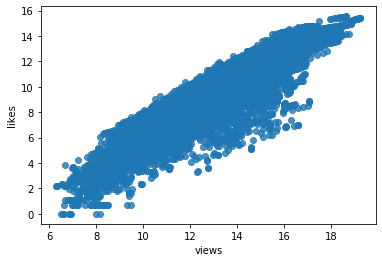

In [50]:
youtube=pd.read_csv('dataset2.csv')

x1=np.log(youtube['views'])
y1=np.log(youtube['likes'])

sns.regplot(x=x1,y=y1,fit_reg=False)